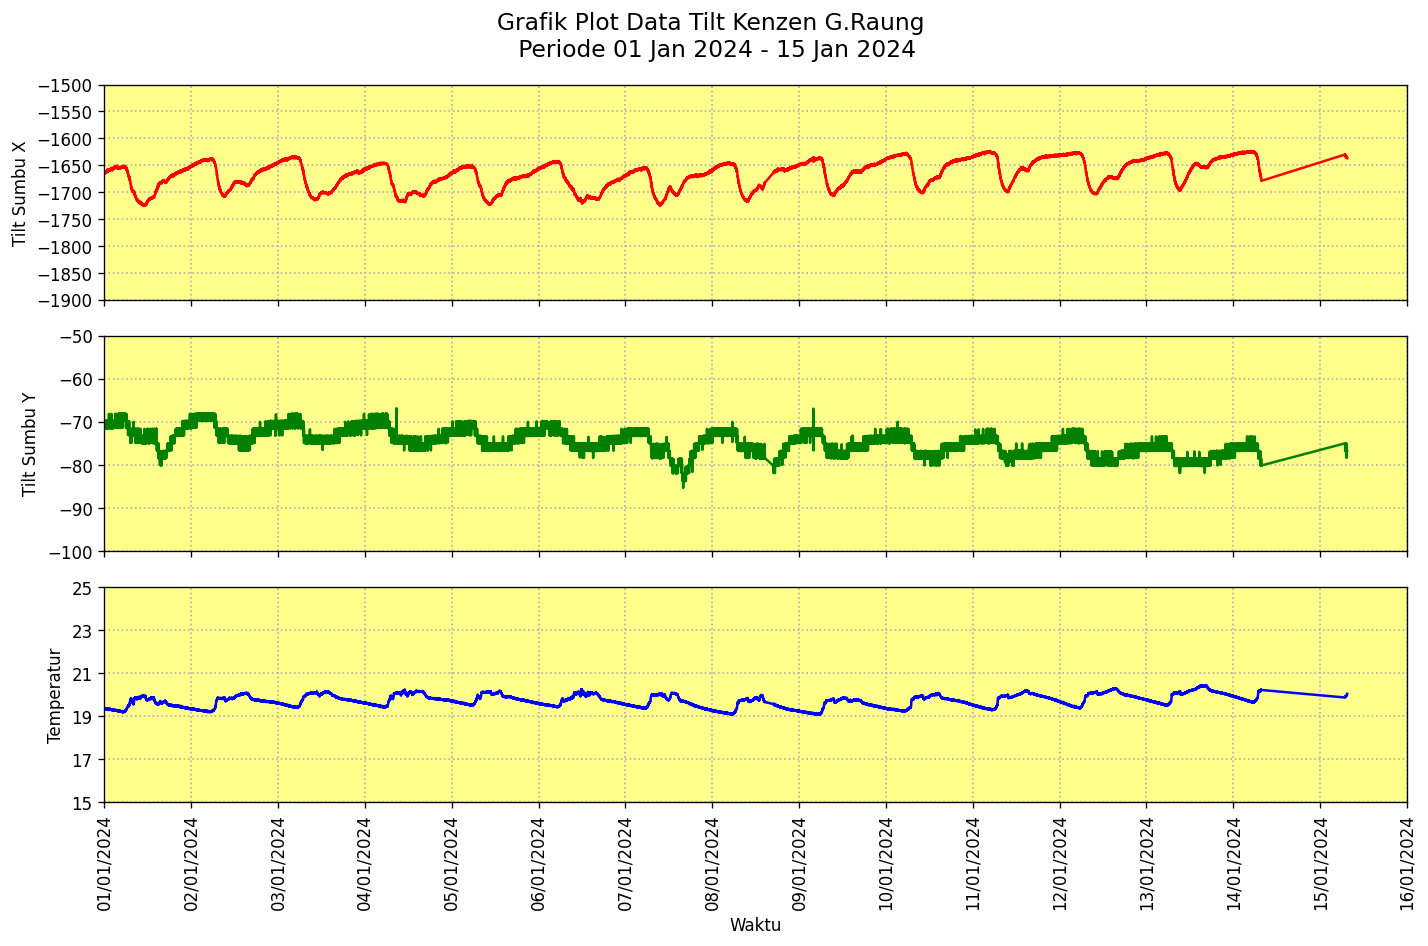

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Fungsi untuk membaca file csv dan menggabungkan kolom tanggal dan waktu, tidak ada yang perlu diubah
def read_data(filename):
    df = pd.read_csv(filename, sep=' ', header=None, names=['Tanggal', 'Waktu', 'Tilt X', 'Tilt Y', 'Temperatur', 'Temp2'])
    df['DateTime'] = pd.to_datetime(df['Tanggal'] + ' ' + df['Waktu'], format='%d/%m/%y %H:%M:%S')
    return df[['DateTime', 'Tilt X', 'Tilt Y', 'Temperatur']]

# Fungsi untuk membuat grafik plot
def create_plots(df, start_date, end_date, range_temp, range_tiltX, range_tiltY, axis_interval_tiltX, axis_interval_tiltY, axis_interval_temp):

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, dpi=120)

    # Grafik 1: Nilai sumbu X, tidak ada yang perlu diubah
    ax1.plot(df['DateTime'], df['Tilt X'], color='red')
    ax1.set_ylabel('Tilt Sumbu X')
    ax1.set_ylim(range_tiltX[0], range_tiltX[1])
    ax1.yaxis.set_ticks(range(range_tiltX[0], range_tiltX[1] + 1, axis_interval_tiltX))
    ax1.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax1.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Grafik 2: Nilai sumbu Y, tidak ada yang perlu diubah
    ax2.plot(df['DateTime'], df['Tilt Y'], color='green')
    ax2.set_ylabel('Tilt Sumbu Y')
    ax2.set_ylim(range_tiltY[0], range_tiltY[1])
    ax2.yaxis.set_ticks(range(range_tiltY[0], range_tiltY[1] + 1, axis_interval_tiltY))
    ax2.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax2.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Grafik 3: Nilai Suhu, tidak ada yang perlu diubah
    ax3.plot(df['DateTime'], df['Temperatur'], color='blue')
    ax3.set_ylabel('Temperatur')
    ax3.set_ylim(range_temp[0], range_temp[1])
    ax3.yaxis.set_ticks(range(range_temp[0], range_temp[1] + 1, axis_interval_temp))
    ax3.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax3.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Input interval tanggal pada grafik, interval=1 berarti 1 hari, selin itu tidak ada yang perlu diubah
    days = mdates.DayLocator(interval=1)
    ax3.xaxis.set_major_locator(days)
    date_formatter = DateFormatter('%d/%m/%Y')
    ax3.xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=90)
    end_date += timedelta(days=1)
    ax3.set_xlim(start_date, end_date)
    end_date -= timedelta(days=1)
    plt.xlabel('Waktu')

    title = 'Grafik Plot Data Tilt Kenzen G.Raung \n Periode {} - {}'.format(start_date.strftime('%d %b %Y'), end_date.strftime('%d %b %Y'))

    plt.suptitle(title, fontsize=14)

    def normal(start, end):
        ax1.axvspan(start, end, facecolor='green', alpha=0.35)
        ax2.axvspan(start, end, facecolor='green', alpha=0.35)
        ax3.axvspan(start, end, facecolor='green', alpha=0.35)

    def waspada(start, end):
        ax1.axvspan(start, end, facecolor='yellow', alpha=0.45)
        ax2.axvspan(start, end, facecolor='yellow', alpha=0.45)
        ax3.axvspan(start, end, facecolor='yellow', alpha=0.45)

    def siaga(start, end):
        ax1.axvspan(start, end, facecolor='orange', alpha=0.5)
        ax2.axvspan(start, end, facecolor='orange', alpha=0.5)
        ax3.axvspan(start, end, facecolor='orange', alpha=0.5)

    def awas(start, end):
        ax1.axvspan(start, end, facecolor='red', alpha=0.55)
        ax2.axvspan(start, end, facecolor='red', alpha=0.55)
        ax3.axvspan(start, end, facecolor='red', alpha=0.55)

    # Memberi warna background sesuai status, ganti tanggal perubahan status sesuai histori, hapus/comment baris yang tidak perlu
    #normal(pd.to_datetime('01/05/2023', format='%d/%m/%Y'), pd.to_datetime('01/12/2023', format='%d/%m/%Y'))
    waspada(pd.to_datetime('19/12/2023', format='%d/%m/%Y'), pd.to_datetime('14/02/2024', format='%d/%m/%Y'))
    # siaga(pd.to_datetime('14/07/2023', format='%d/%m/%Y'), pd.to_datetime('21/07/2023', format='%d/%m/%Y'))
    # awas(pd.to_datetime('21/07/2023', format='%d/%m/%Y'), pd.to_datetime('31/07/2023', format='%d/%m/%Y'))

    plt.tight_layout()
    # plt.savefig('Tilt_Kenzen_' + end_date.strftime("%Y-%m-%d") + '.png')
    plt.show()

# Program utama
filename = '/content/drive/MyDrive/data/Kenzen_est_2023.csv'  # Ubah sesuai dengan nama & lokasi file.Cara paling mudah Upload ke sidebar samping dan sesuaikan nama file.
df = read_data(filename)

# Ubah tanggal awal dan akhir plot yang diinginkan
start_date = pd.to_datetime('01/01/2024', format='%d/%m/%Y')
end_date = pd.to_datetime('15/01/2024', format='%d/%m/%Y')

# Input rentang dan interval pada sumbu y sesuai kebutuhan, range untuk nilai minimum dan maksimum, interval untuk interval
range_temp = (15, 25)
axis_interval_temp = 2

range_tiltX = (-1900, -1500)
axis_interval_tiltX = 50

range_tiltY = (-100, -50)
axis_interval_tiltY = 10


create_plots(df, start_date, end_date, range_temp, range_tiltX, range_tiltY, axis_interval_tiltX, axis_interval_tiltY, axis_interval_temp)


# @mukijo, 2023
# 0856-4334-6785